## Import Library

In [ ]:
import tweepy
import re
import csv
import pandas as pd
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


## Input Twitter API Key

In [ ]:
consumer_key = "earScsYmfXq5tOUpzEziXxKwt"
consumer_secret = "C6VouJVg0UUahbSqasFQAcRUE3dNdnaZFamS9zrXnp4cqOvAyP"
access_token = "66106451-UFbSuHUjKFViuD5RaW3B14AIMmzlEcuEMFK4xrZCu"
access_token_secret = "xw78fGFsSmdX3KXZpHIgcU03yK64gxoYfZ2lfjhyZ5stU"

#bearer = "AAAAAAAAAAAAAAAAAAAAAFiE1wAAAAAAzHKt8Y%2BmjC8lFkBrRUvXmn0w%2B2E%3DqDlg2urn45VOs9cfEwsW6YHWvX16T7FXlF1szqLk4WzhXAolVy"

## Set Twitter API

In [ ]:
# handler autentikasi
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## Input Keyword

In [ ]:
keyword = input("Masukan keyword:")
noOfTweet = int(input("Jumlah tweet untuk di analisa: "))
tweets = tweepy.Cursor(api.search, q=keyword, lang="id").items(noOfTweet)
tweet_list = []
tweet_user = []
tweet_id = []
tweet_loc = []


for tweet in tweets:
    print(tweet.text)
    tweet_list.append(tweet.text)
    tweet_user.append(tweet.user.screen_name)
    tweet_id.append(tweet.user.id)
    tweet_loc.append(tweet.user.location)

Masukan keyword:indonesia
Jumlah tweet untuk di analisa: 10
RT @gwenkyute: Indonesia Tahan dari Ancaman Krisis Dunia🙏🏿

Ekonomi Indonesia akan terus tumbuh 5% setiap tahun hingga 2025. Meski kita sem…
Ramai2 pergi indonesia japgi ni
RT @PolJokesID: Jagoan kalian yang mana di WWE Special Event Royal Rumble Indonesia? https://t.co/JbEt2NPpis
RT @sahmurakala: ️️
Rungunya mendengar pertanyaan ‘orang Korea Selatan ya?’, lantas Ia tersenyum dan menanggapi pertanyaan tersebut.…
RT @ChrisJ_2211: Di Indonesia skrg banyak manusia2 jelmaan iblis seperti @restyca_yah ini👇
Yg gue bingung https://t.co/HkQZiuzaDj kenapa ik…
Ini merupakan dampak nyata yang dihasilkan dari penyelenggaraan Presidensi G20 Indonesia. Harapannya, konsistensi d… https://t.co/LTJEwj9I0B
RT @ifugre: @ruliemaulana Yang gw apal mah 9.1jt = RM 2700, gaji drafter RM 4000. Masih aman banget.

Indonesia biaya hidup 5jt+, tapi gaji…
RT @kemendespdtt: Direktur International Fund for Agricultural Development (IFAD) Indonesia, Ivan Cos

## Show Tweet List

In [ ]:
#SHow tweet list
tweet_list, len(tweet_list)

(['RT @gwenkyute: Indonesia Tahan dari Ancaman Krisis Dunia🙏🏿\n\nEkonomi Indonesia akan terus tumbuh 5% setiap tahun hingga 2025. Meski kita sem…',
  'Ramai2 pergi indonesia japgi ni',
  'RT @PolJokesID: Jagoan kalian yang mana di WWE Special Event Royal Rumble Indonesia? https://t.co/JbEt2NPpis',
  'RT @sahmurakala: ️️\nRungunya mendengar pertanyaan ‘orang Korea Selatan ya?’, lantas Ia tersenyum dan menanggapi pertanyaan tersebut.…',
  'RT @ChrisJ_2211: Di Indonesia skrg banyak manusia2 jelmaan iblis seperti @restyca_yah ini👇\nYg gue bingung https://t.co/HkQZiuzaDj kenapa ik…',
  'Ini merupakan dampak nyata yang dihasilkan dari penyelenggaraan Presidensi G20 Indonesia. Harapannya, konsistensi d… https://t.co/LTJEwj9I0B',
  'RT @ifugre: @ruliemaulana Yang gw apal mah 9.1jt = RM 2700, gaji drafter RM 4000. Masih aman banget.\n\nIndonesia biaya hidup 5jt+, tapi gaji…',
  'RT @kemendespdtt: Direktur International Fund for Agricultural Development (IFAD) Indonesia, Ivan Cossio Cortez mengu

## Show User

In [ ]:
#Show user
tweet_user, len(tweet_user)

(['selfmirror_',
  'jennjjane_',
  'penganutQG',
  'ontaoren',
  'kolerisromantis',
  'KemnakerRI',
  'ruliemaulana',
  'SajimanB',
  'M_hadi08',
  'AzamJavas'],
 10)

## Show Tweet ID

In [ ]:
#Show tweet ID
tweet_id, len(tweet_id)


([1206016618481864705,
  1032141057553645571,
  1228871109006594048,
  766150190025863168,
  1151326863484047361,
  409757397,
  185320244,
  1497580150539517956,
  832378762763264000,
  1513651601067548673],
 10)

## Show Location User

In [ ]:
#Show location User
tweet_loc, len(tweet_loc)

(['',
  'anywhere',
  'Kota Bandung, Jawa Barat',
  '久土星輝の彼氏',
  'Jakarta Capital Region',
  'www.goo.gl/maps/B7uJW3NksVv',
  'Indonesia',
  '',
  'Kota Medan, Sumatera Utara',
  ''],
 10)

## Cleaning Text

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    return text

tw_list['text'] = tw_list['text'].apply(lambda x:clean_text(x))
tw_list.head(10)

,0,text
0,RT @gwenkyute: Indonesia Tahan dari Ancaman Kr...,gwenkyute indonesia tahan dari ancaman krisis...
1,Ramai2 pergi indonesia japgi ni,pergi indonesia japgi ni
2,RT @PolJokesID: Jagoan kalian yang mana di WWE...,poljokesid jagoan kalian yang mana di wwe spe...
3,RT @sahmurakala: ️️\nRungunya mendengar pertan...,sahmurakala ️️rungunya mendengar peanyaan ‘or...
4,RT @ChrisJ_2211: Di Indonesia skrg banyak manu...,di indonesia skrg banyak jelmaan iblis sepei ...
5,Ini merupakan dampak nyata yang dihasilkan dar...,ini merupakan dampak nyata yang dihasilkan dar...
6,RT @ifugre: @ruliemaulana Yang gw apal mah 9.1...,ifugre ruliemaulana yang gw apal mah rm gaji ...
7,RT @kemendespdtt: Direktur International Fund ...,kemendespdtt direktur international fund for ...
8,@cakimiNOW Gus. Muhaimin senantiasa inovatif d...,cakiminow gus muhaimin senantiasa inovatif dal...
9,@z4r4n @yahyastaquf Ya Allah berikanlah selalu...,yahyastaquf ya allah berikanlah selalu keseha...


## Wordcloud

Word Cloud Saved Successfully


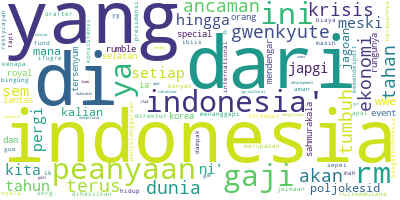

In [ ]:


#Function to Create Wordcloud
def create_wordcloud(text):
    #mask = np.array(Image.open("../input/cloudpng/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    #mask = mask,
    max_words=100,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

create_wordcloud(tw_list["text"].values)